In [3]:
# Import packages, the Y-matrix for the dataset and Functions.py
import numpy as np
%run FB-messages_data_import.ipynb
import sys
sys.path.append('../')
from Functions import * 
import copy
import random
%store -r points
%store -r random_numbers_matrix

In [4]:
num_samples = 1266
alpha = 5
dim = 2

In [34]:
True_posetiv = np.zeros(len(random_numbers_matrix))
True_negativ = np.zeros(len(random_numbers_matrix))
False_posetiv = np.zeros(len(random_numbers_matrix))
False_negativ = np.zeros(len(random_numbers_matrix))

True_posetiv_baseline = np.zeros(len(random_numbers_matrix))
True_negativ_baseline = np.zeros(len(random_numbers_matrix))
False_posetiv_baseline = np.zeros(len(random_numbers_matrix))
False_negativ_baseline = np.zeros(len(random_numbers_matrix))

Accuracy = np.zeros(len(random_numbers_matrix))
Accuracy_baseline = np.zeros(len(random_numbers_matrix))

MLL_final = np.zeros(len(random_numbers_matrix)) # Define the MLL
grad_sum_final = np.zeros(len(random_numbers_matrix)) # Define the gradient sum

for s in range(1): #len(random_numbers_matrix)
    Y_updated = np.delete(Y,random_numbers_matrix[s].flatten().astype(int), axis=0)

    prev_grad = 1000000002
    grad = 0
    n = 100000
    points_copy = copy.deepcopy(points)
    MLL = np.zeros(n) # Define the MLL
    grad_sum = np.zeros(n) # Define the gradient sum
    k = 0

    while abs(prev_grad - grad) > 100: # stopping criteria
        print(prev_grad - grad)
        prev_grad = grad
        for i in range(1,num_samples+1): # Run over number of num_samples
            grad_now = Gradient_function_fast(i,dim,Y_updated,points_copy,alpha)
            grad_sum[k] += np.sum((grad_now)**2)
            points_copy[i] += LR((k+1)*500)*grad_now # Use Gradient_function and take step=0.1*grad
        grad = grad_sum[k]
        MLL[k] = Loss_function_fast(points_copy,Y_updated,alpha) # Calcualte the probability using Loss_function
        k += 1
    print(s)

    MLL_final[s] = MLL[k-1]
    grad_sum_final[s] = grad_sum[k-1]

    connections = Y[random_numbers_matrix[s].flatten().astype(int), 0]
    point_a = [points_copy[i] for i in Y[random_numbers_matrix[s].flatten().astype(int),1]]
    point_b = [points_copy[i] for i in Y[random_numbers_matrix[s].flatten().astype(int),2]]
    points_a_np = np.array(point_a)
    points_b_np = np.array(point_b)

    distances = np.sum((points_a_np - points_b_np) ** 2, axis=1)
    sigmoid_value = 1 / (1 + np.exp(-1 * (alpha - distances)))

    True_posetiv[s] = np.sum(connections*sigmoid_value >= 0.5)
    False_posetiv[s] = np.sum(connections*sigmoid_value <= -0.5)
    True_negativ[s] = np.sum((connections*sigmoid_value > -0.5) & (connections*sigmoid_value < 0))
    False_negativ[s] = np.sum((connections*sigmoid_value >= 0) & (connections*sigmoid_value < 0.5))

    Baseline = Baseline_function(Y,random_numbers_matrix[s].flatten().astype(int),Y_updated)
    True_posetiv_baseline[s] = np.sum(connections*Baseline >= 0.5)
    False_posetiv_baseline[s] = np.sum(connections*Baseline <= -0.5)
    True_negativ_baseline[s] = np.sum((connections*Baseline > -0.5) & (connections*sigmoid_value <= 0))
    False_negativ_baseline[s] = np.sum((connections*Baseline > 0) & (connections*sigmoid_value < 0.5))

    Accuracy[s] = (True_posetiv[s]+True_negativ[s])/(len(sigmoid_value))
    Accuracy_baseline[s] = (True_posetiv_baseline[s]+True_negativ_baseline[s])/(len(Baseline))

1000000002
-1018839356.7351056
596232342.6226329
58742915.64744365
45929861.47667694
37301355.88866979
30698687.161599398
25581728.24261418
21565769.21279359
18373078.599678397
15802473.890773118
13707341.580965847
11979986.930601954
10540576.389841542
9329338.914179415
8301053.232492864
7421132.861846015
6662829.747299612
6005224.537175149
5431772.843490034
4929246.350057036
4486955.663263202
4096175.3050866276
3749714.7018424273
3441595.3831209987
3166805.9671592265
2921114.4230913594
2700922.6967979446
2503152.832682967
2325156.6979233623
2164643.6079239547
2019621.7524200901
1888350.4757327437
1769301.2866779417
1661126.0499769375
1562631.2003902942
1472757.052202113
1390561.3579101488
1315206.228587389
1245947.4595809057
1182125.3537120447
1123156.3851823136
1068525.4278897494
1017778.588059701
970516.7768806629
926390.0400683098
885092.4733509049
846357.4535302147
809952.9661639519
775676.9639976583
743352.8464265168
712825.2361651473
683956.2310639359
656622.255933214
630711.567

In [68]:
%store sigmoid_value
%store Baseline
%store connections

Stored 'sigmoid_value' (ndarray)
Stored 'Baseline' (ndarray)
Stored 'connections' (ndarray)


In [35]:
(True_posetiv[s]+True_negativ[s])/(len(sigmoid_value))

0.9521668540027476

In [6]:
conf_matrix = np.array([[np.mean(True_posetiv), np.mean(False_negativ)],
                        [np.mean(False_posetiv), np.mean(True_negativ)]])
Accuracy = (np.mean(True_posetiv)+np.mean((True_negativ)))/(len(sigmoid_value))

In [65]:
stupid_baseline = [6451/num_connectins] * len(sigmoid_value) 

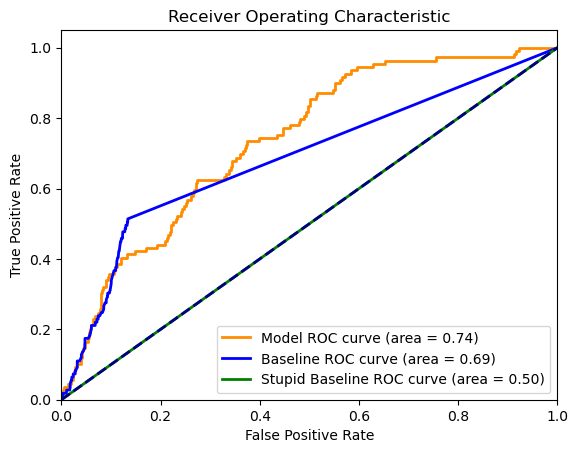

In [66]:
from sklearn.metrics import roc_curve, auc
# Compute FPR, TPR, and thresholds
y_true = connections
y_true[y_true == -1] = 0

# Compute ROC curve and AUC for sigmoid_value predictions
fpr1, tpr1, _ = roc_curve(y_true, sigmoid_value)
roc_auc1 = auc(fpr1, tpr1)

# Compute ROC curve and AUC for baseline predictions
fpr2, tpr2, _ = roc_curve(y_true, Baseline)
roc_auc2 = auc(fpr2, tpr2)

# Compute ROC curve and AUC for stupid baseline predictions
fpr3, tpr3, _ = roc_curve(y_true, stupid_baseline)
roc_auc3 = auc(fpr3, tpr3)

# Plot the ROC curve for all models
plt.figure()
plt.plot(fpr1, tpr1, color='darkorange', lw=2, label='Model ROC curve (area = %0.2f)' % roc_auc1)
plt.plot(fpr2, tpr2, color='blue', lw=2, label='Baseline ROC curve (area = %0.2f)' % roc_auc2)
plt.plot(fpr3, tpr3, color='green', lw=2, label='Stupid Baseline ROC curve (area = %0.2f)' % roc_auc3)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

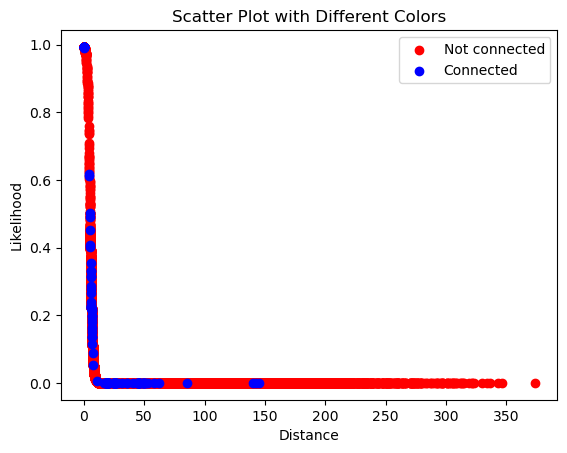

In [36]:
plt.scatter(distances[connections == -1], sigmoid_value[connections == -1], color='red', label='Not connected')
plt.scatter(distances[connections == 1], sigmoid_value[connections == 1], color='blue', label='Connected')
plt.xlabel('Distance')
#plt.xlim(4,5)
plt.ylabel('Likelihood')
plt.title('Scatter Plot with Different Colors')
plt.legend()
plt.show()


In [ ]:
from sklearn.metrics import roc_curve, auc
# Compute FPR, TPR, and thresholds
fpr, tpr, thresholds = roc_curve(y_true, sigmoid_value)
connections*sigmoid_value 
# Calculate the AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

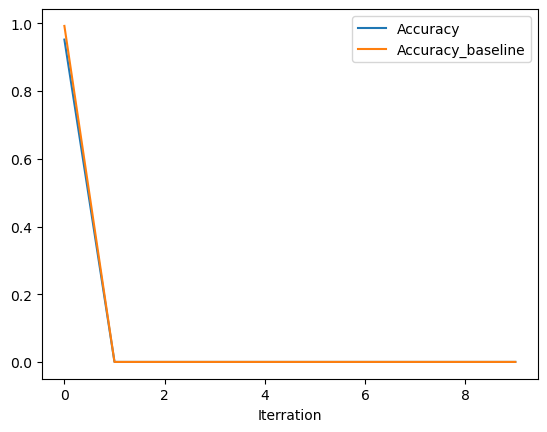

In [38]:
plt.plot(Accuracy,label='Accuracy')
plt.plot(Accuracy_baseline, label='Accuracy_baseline')
#plt.ylabel('MLL')
plt.xlabel('Iterration')
plt.legend()
plt.show()

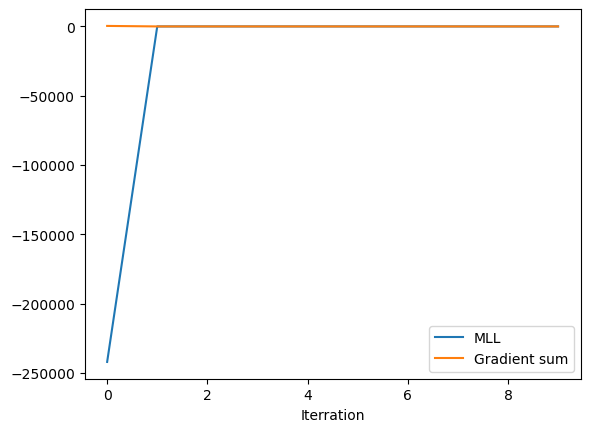

In [42]:
plt.plot(MLL_final,label='MLL')
plt.plot(np.sqrt(grad_sum_final), label='Gradient sum')
#plt.ylabel('MLL')
plt.xlabel('Iterration')
plt.legend()
plt.show()

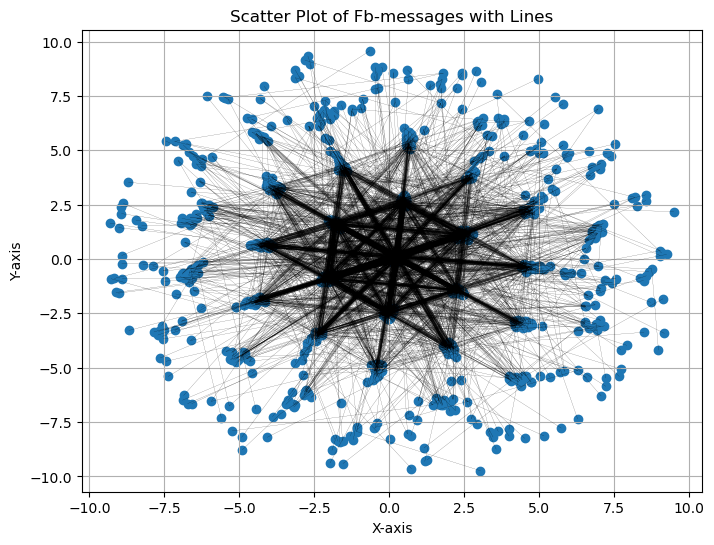

In [45]:
plt.figure(figsize=(8, 6))

for m in range(len(Y)): 
    if Y[m][0] == 1: # Check if there is a connection between Y[m][1] and Y[m][2]
        point1 = points_copy[Y[m][1]]
        point2 = points_copy[Y[m][2]]
        plt.plot([point1[0], point2[0]], [point1[1], point2[1]], color='black', linewidth=0.1) # Ad a line between Y[m][1] and Y[m][2]

# extract the points and plot them
x = [point[0] for point in points_copy.values()]
y = [point[1] for point in points_copy.values()]
plt.scatter(x, y)

plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Scatter Plot of Fb-messages with Lines')
plt.grid(True)
plt.show()